In [ ]:
import pymc3 as pm
import numpy as np
import arviz as az

print(pm.__version__)
print("NumPy version:", np.__version__)
print("ArviZ version:", az.__version__)

In [ ]:
with pm.Model() as poisson_model:
    lambda_ = pm.Exponential("lambda", 1.0)  # prior sur le taux
    obs = pm.Poisson("obs", mu=lambda_, observed=[3, 4, 2, 6, 5])
    trace = pm.sample()


The version of PyMC you are using is very outdated.

Please upgrade to the latest version of PyMC https://www.pymc.io/projects/docs/en/stable/installation.html

Also notice that PyMC3 has been renamed to PyMC.
c:\Users\Nathan\anaconda3\envs\bayesenv\lib\site-packages\deprecat\classic.py:232: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [lambda]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 23 seconds.


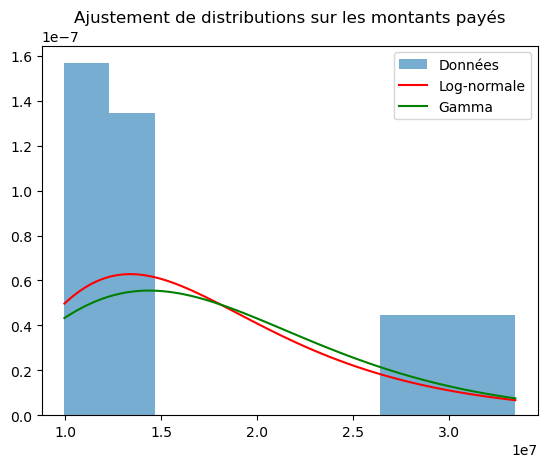

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Exemple avec tes montants payés
montants = np.array([
    14409452.32, 14056889.11, 13701192.37, 13342334.26,
    12980286.66, 12615021.24, 12246509.4, 11874722.28,
    11499630.76, 11121205.49, 10739416.84, 10354234.9,
    9965629.52, 33463048.95, 32097250.98, 30720123.26,
    29331571.81, 27931501.88, 26519817.9
])

plt.hist(montants, bins=10, density=True, alpha=0.6, label="Données")

# Ajuster une log-normale
shape, loc, scale = stats.lognorm.fit(montants, floc=0)
x = np.linspace(min(montants), max(montants), 100)
plt.plot(x, stats.lognorm.pdf(x, shape, loc, scale), label="Log-normale", color='red')

# Ajuster une gamma
a, loc, scale = stats.gamma.fit(montants, floc=0)
plt.plot(x, stats.gamma.pdf(x, a, loc, scale), label="Gamma", color='green')

plt.legend()
plt.title("Ajustement de distributions sur les montants payés")
plt.show()